In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('EDA football/results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [130]:
df.shape

(41586, 9)

In [131]:
df.corr() # to find the pairwise correlation of all columns

,home_score,away_score,neutral
home_score,1.000000,-0.136095,-0.032350
away_score,-0.136095,1.000000,0.084968
neutral,-0.032350,0.084968,1.000000


In [132]:
for i,col in enumerate(df.columns): #This assigns the column with its respective index number
    print((i+1), ':', col) 

1 : date
2 : home_team
3 : away_team
4 : home_score
5 : away_score
6 : tournament
7 : city
8 : country
9 : neutral


In [133]:
away_team=pd.DataFrame(df.groupby('away_team')['home_score'].count().index) #this assigns index to the away team
away_score=pd.DataFrame(df.groupby('away_team')['home_score'].count().values,columns=['Score']) # It gets the score of away team
away_score_team=pd.concat([away_team,away_score],axis=1)
print(away_score_team)

         away_team  Score
0         Abkhazia     10
1      Afghanistan     71
2          Albania    157
3         Alderney     12
4          Algeria    213
..             ...    ...
300     Yugoslavia    290
301         Zambia    418
302       Zanzibar    147
303       Zimbabwe    266
304  Åland Islands     19

[305 rows x 2 columns]


In [134]:
away_score_team=away_score_team.sort_values(by='Score',ascending=False)
print(away_score_team)

              away_team  Score
283             Uruguay    541
255              Sweden    532
84              England    511
122             Hungary    475
204            Paraguay    453
..                  ...    ...
16             Asturias      1
23               Barawa      1
63              Corsica      1
205  Parishes of Jersey      1
254              Surrey      1

[305 rows x 2 columns]


  This plots shows about the away team and their score

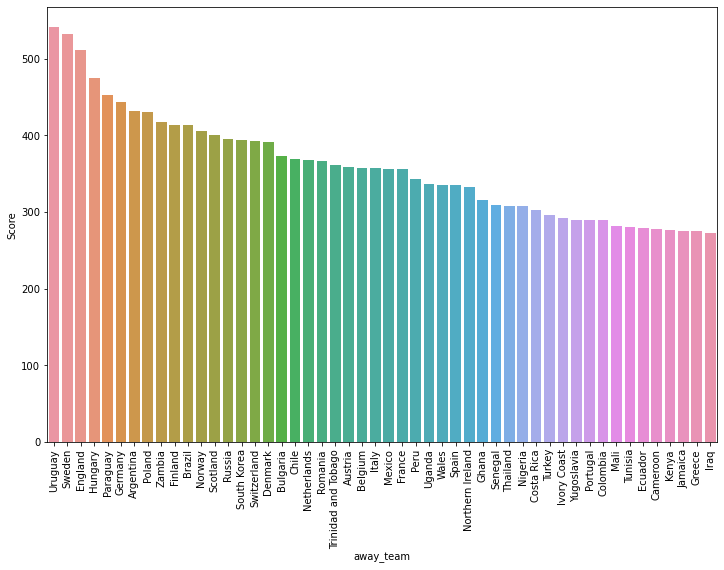

In [135]:
plt.figure(figsize=(12,8))
away_score_team=away_score_team.sort_values(by='Score', ascending= False)
sns.barplot(x=away_score_team.away_team[:50],y=away_score_team.Score[:50])
plt.xticks(rotation=90)
plt.show()

In [136]:
df['tournament'].unique() #These are the list of tournaments being held

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [137]:
df['tournament'].value_counts()

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
OSN Cup                                     4
World Unity Cup                             4
Atlantic Heritage Cup                       2
Copa América qualification                  2
AFF Championship qualification              2
Name: tournament, Length: 112, dtype: int64

It plots about the number of tournament being hosted

In [138]:
tournament=df['tournament'].value_counts()
names=tournament.index
values=tournament.values

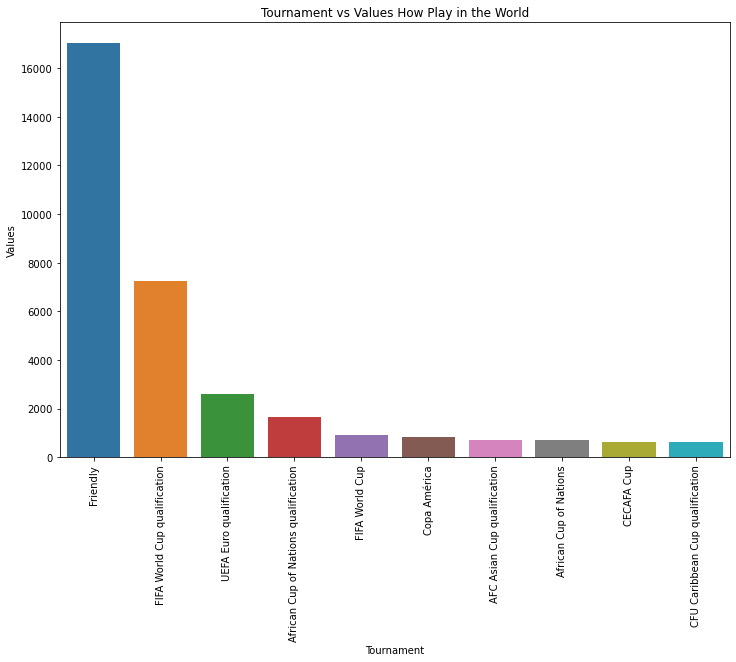

In [139]:
plt.figure(figsize=(12,8))
sns.barplot(x=names[:10],y=values[:10])
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.xlabel('Tournament')
plt.title('Tournament vs Values How Play in the World')
plt.show()

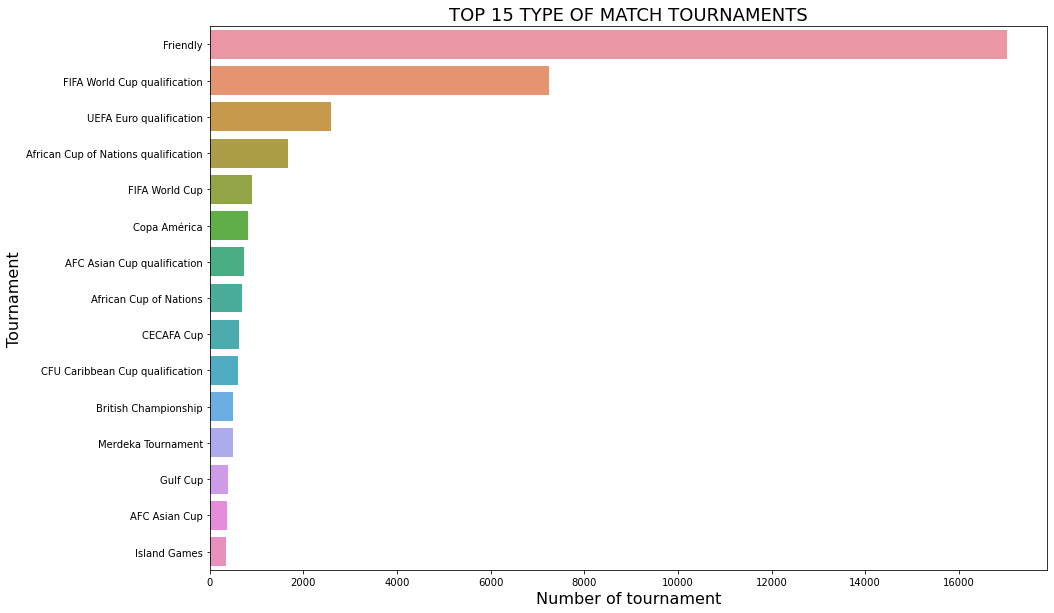

In [140]:
matches = df.astype({'date':'datetime64[ns]'})
tournament = matches['tournament'].value_counts()
tournament = tournament[:15]

plt.figure(figsize = (15,10))
ax = sns.barplot(y=tournament.index, x=tournament.values, orient='h')
ax.set_ylabel('Tournament', size=16)
ax.set_xlabel('Number of tournament', size=16)
ax.set_title("TOP 15 TYPE OF MATCH TOURNAMENTS", fontsize=18)
plt.show()

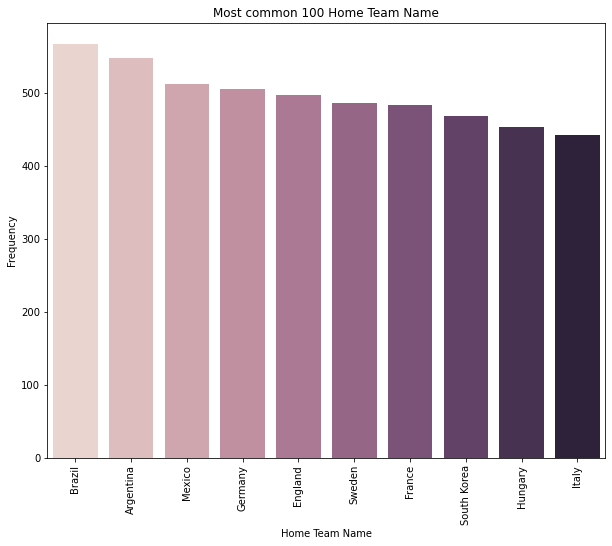

In [141]:
home_name_index=df.home_team.value_counts()
home_name_index=home_name_index.head(10)

plt.figure(figsize=(10,8))
ax=sns.barplot(x=home_name_index.index,y=home_name_index.values,palette=sns.cubehelix_palette(len(home_name_index.index)))
plt.xlabel('Home Team Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Most common 100 Home Team Name')
plt.show()

In [142]:
veri=df[df['tournament']=='FIFA World Cup'].tail(56)

len(veri['home_team'].unique())
allteam=veri['home_team'].unique()
allteam

array(['Costa Rica', 'Germany', 'Brazil', 'Sweden', 'Belgium', 'Tunisia',
       'Colombia', 'Poland', 'Russia', 'Portugal', 'Uruguay', 'Iran',
       'Denmark', 'France', 'Argentina', 'Nigeria', 'Serbia',
       'South Korea', 'England', 'Japan', 'Saudi Arabia', 'Spain',
       'Australia', 'Iceland', 'Mexico', 'Switzerland', 'Senegal',
       'Panama', 'Croatia'], dtype=object)

In [143]:
away_scores_allteam=[]
home_scores_allteam=[]
for team in allteam:
    toplam=sum(veri[veri['home_team']==team].away_score)
    away_scores_allteam.append(toplam)
    home_scores_allteam.append(sum(veri[veri['home_team']==team].home_score))
    toplam=0


all_team=pd.DataFrame([allteam,home_scores_allteam,away_scores_allteam])
   

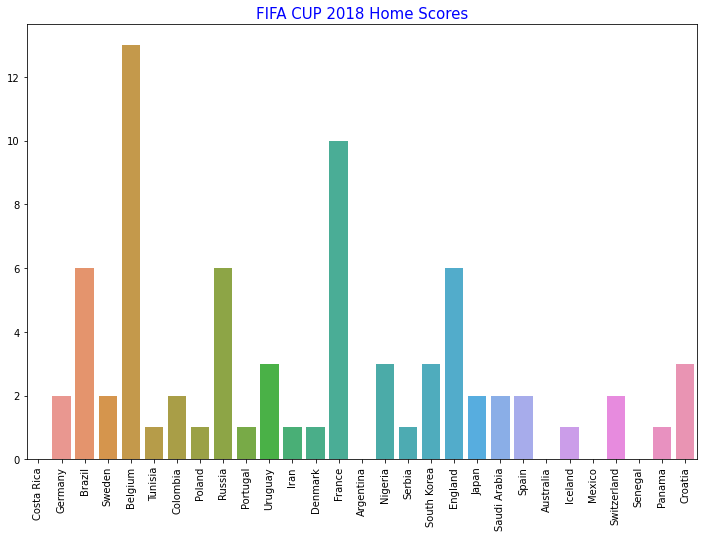

In [144]:
plt.figure(figsize=(12,8))
sns.barplot(x=allteam,y=home_scores_allteam)
plt.title('FIFA CUP 2018 Home Scores',color='b',fontsize=15)
plt.xticks(rotation=90)
plt.show()

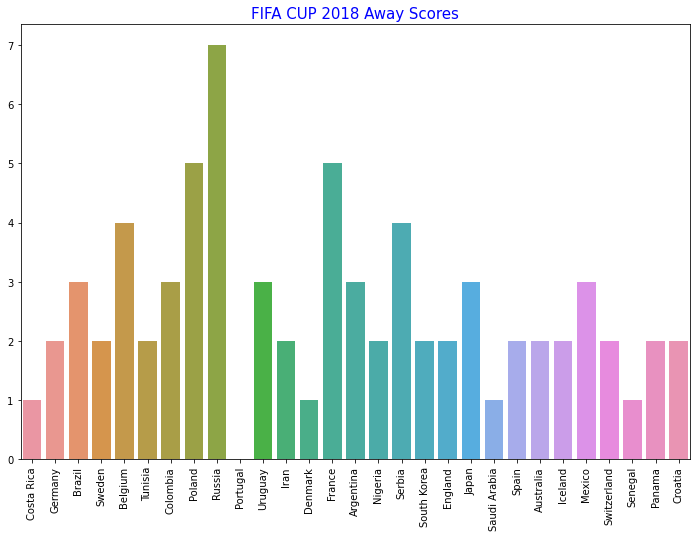

In [145]:
plt.figure(figsize=(12,8))
sns.barplot(x=allteam,y=away_scores_allteam)
plt.title('FIFA CUP 2018 Away Scores',color='b',fontsize=15)
plt.xticks(rotation=90)
plt.show()

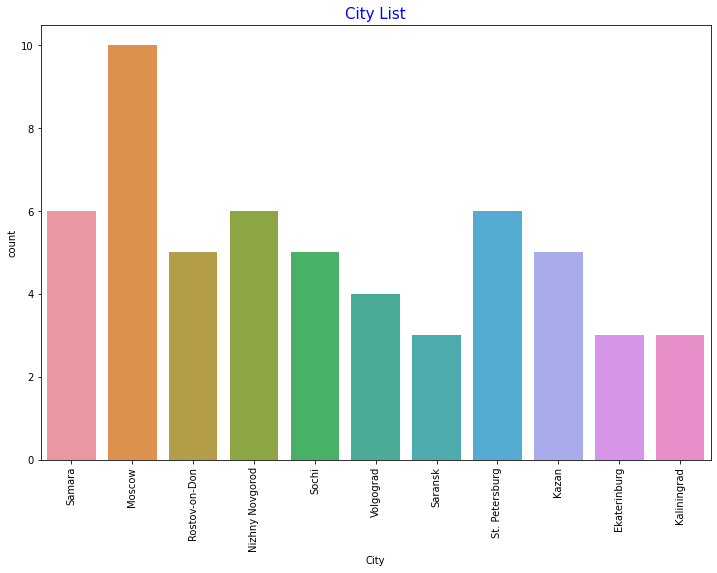

In [146]:
plt.figure(figsize=(12,8))
sns.countplot(veri.city)
plt.xlabel('City')
plt.xticks(rotation=90)
plt.title('City List',color='blue',fontsize=15)
plt.show()

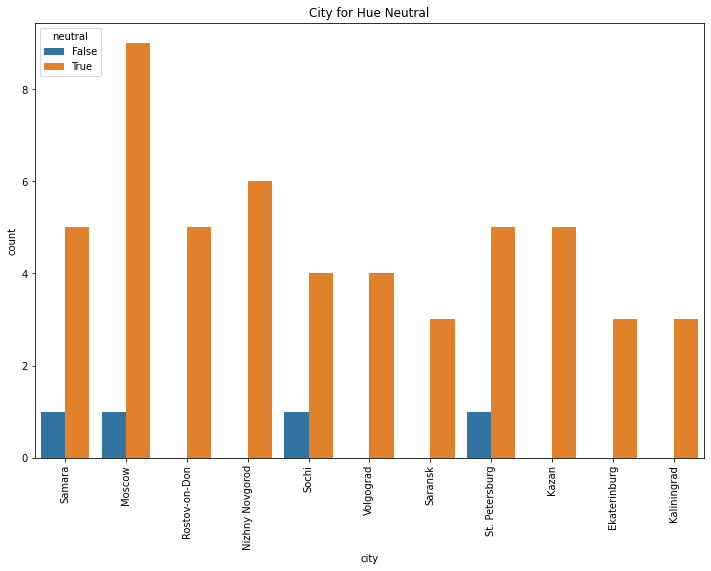

In [147]:
plt.figure(figsize=(12,8))
sns.countplot(veri.city,hue=veri.neutral)
plt.xticks(rotation=90)
plt.title('City for Hue Neutral')
plt.show()